In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\\Windows\\Fonts\\HYBDAL.TTF").get_name() 
rc('font', family=font_name) 			

import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

In [33]:
from sklearn.datasets import load_wine
wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [35]:
data  = wine.data
target = wine.target
feature_names = wine.feature_names
print(data.shape, target.shape)
print(feature_names)
print(data[:5]) 
print(target[:5])

(178, 13) (178,)
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]
[0 0 0 0 0]


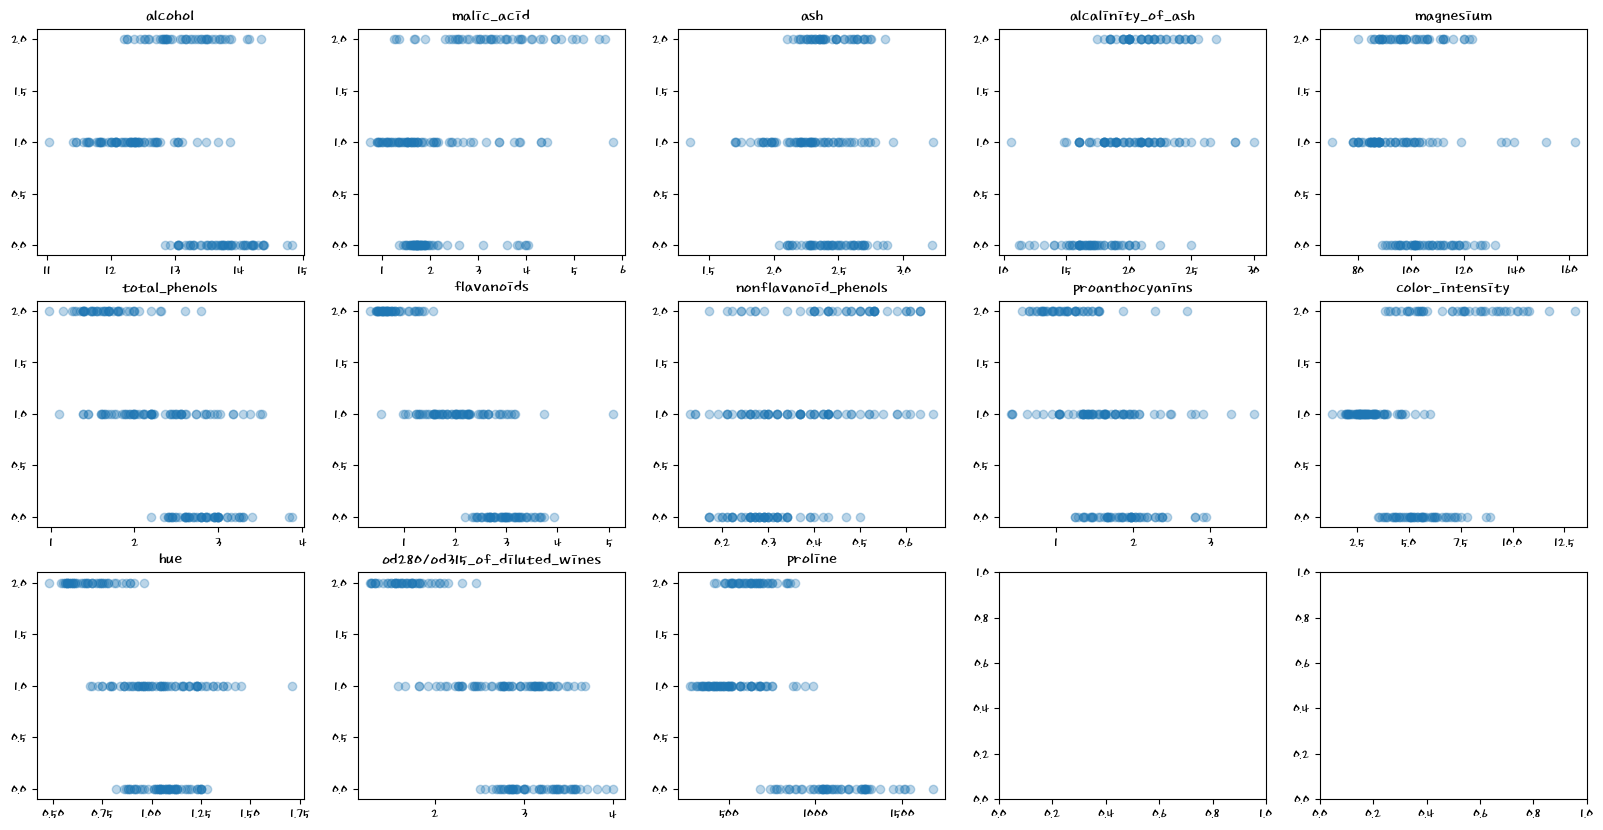

In [37]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10)) #전체 그림판과 각각의 subplot을 반환
y = target

for i, ax in enumerate(axes.ravel()): 
    if i < data.shape[1]:
        x = data[:,i]  

        ax.set_title(feature_names[i]) # subplot의 제목을 변수의 이름으로
        ax.scatter(x, y , alpha=0.3)
plt.show()

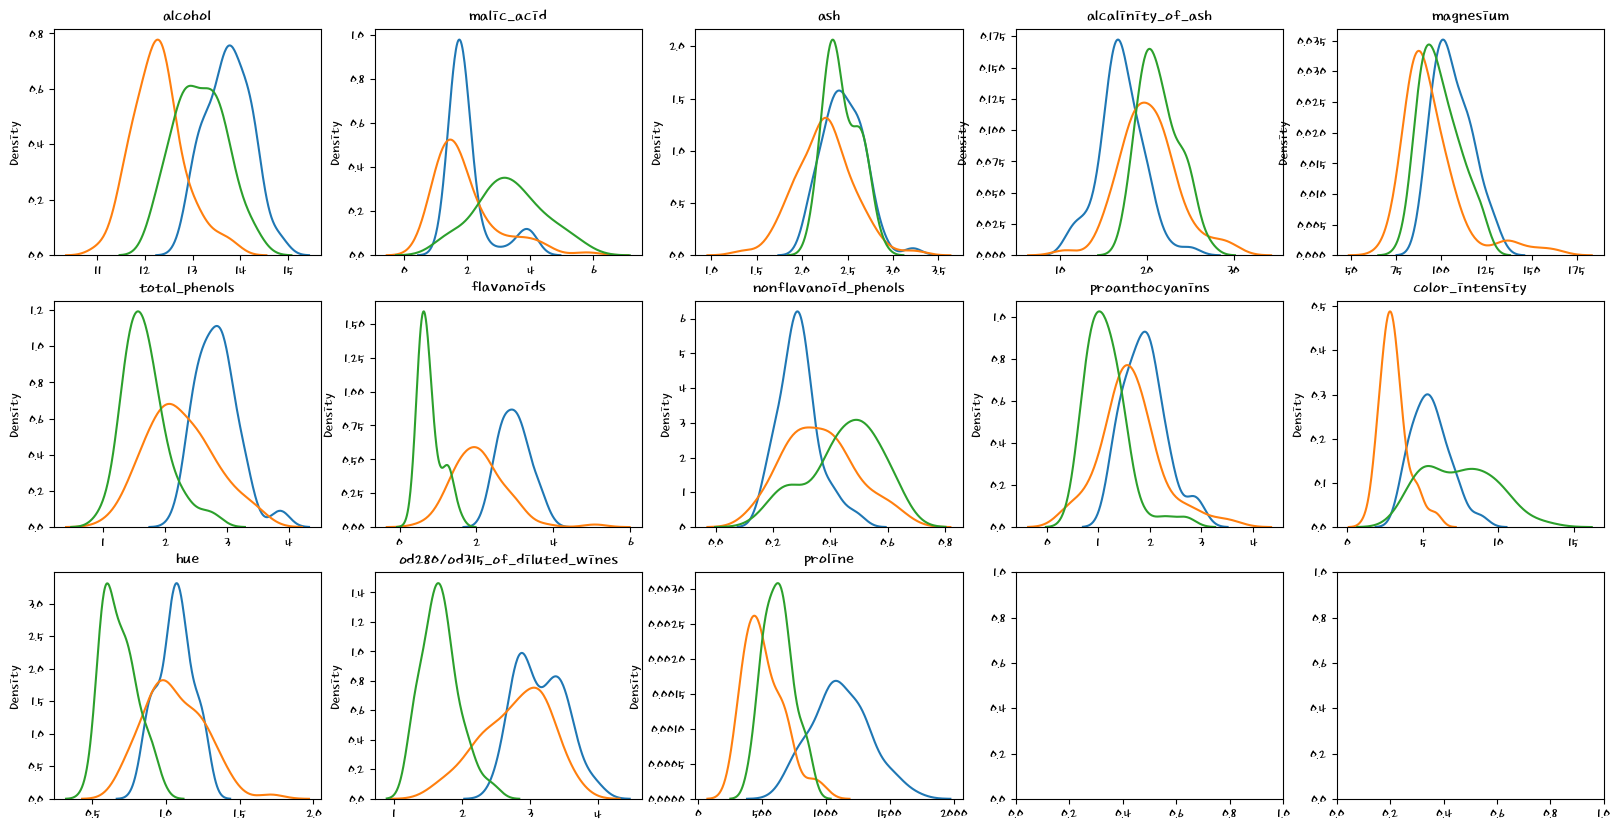

In [73]:
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

fig, axes = plt.subplots(3, 5, figsize=(20, 10)) 
#y = wine.target
#y = wine.target.astype('str') # target data의 type을 string으로 변환
y = wine.target # target data의 type을 string으로 변환

for i, ax in enumerate(axes.ravel()): #나누어진 각 subplot에 대해
    if i < wine.data.shape[1]:
        x = wine.data[:,i]

        ax.set_title(wine.feature_names[i])
        sns.kdeplot(x[y == 0], ax=ax)
        sns.kdeplot(x[y == 1], ax=ax)
        sns.kdeplot(x[y == 2], ax=ax)
plt.show()

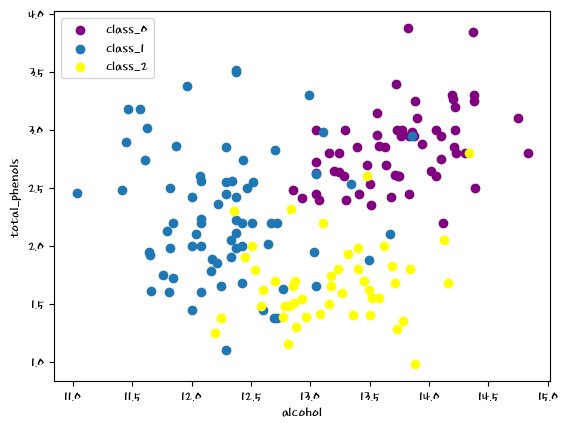

In [69]:
plt.scatter(wine.data[wine.target == 0, 0], wine.data[wine.target == 0, 5], color = 'purple')
plt.scatter(wine.data[wine.target == 1, 0], wine.data[wine.target == 1, 5])
plt.scatter(wine.data[wine.target == 2, 0], wine.data[wine.target == 2, 5], color = 'yellow')

plt.legend(['class_0', 'class_1', 'class_2'])
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[5])
plt.show()

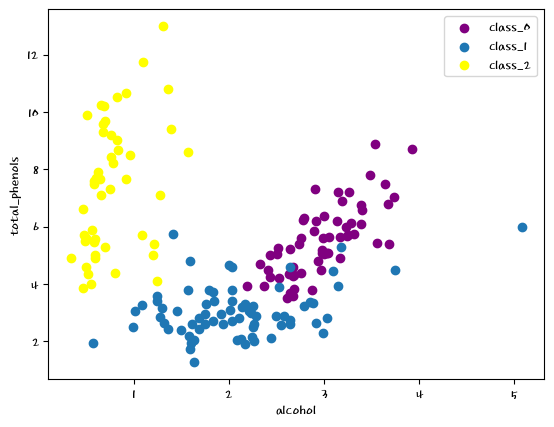

In [77]:
plt.scatter(wine.data[wine.target == 0, 6], wine.data[wine.target == 0, 9], color = 'purple')
plt.scatter(wine.data[wine.target == 1, 6], wine.data[wine.target == 1, 9])
plt.scatter(wine.data[wine.target == 2, 6], wine.data[wine.target == 2, 9], color = 'yellow')

plt.legend(['class_0', 'class_1', 'class_2'])
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[5])
plt.show()

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, random_state=2024, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(142, 13) (142,)
(36, 13) (36,)


In [83]:
from sklearn.linear_model import LogisticRegression

LR_clf = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
LR_clf.fit(X_train, y_train)

C:\Users\yen40\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [85]:
print('Train set score: {:.3f}'.format(LR_clf.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(LR_clf.score(X_test, y_test)))

Train set score: 0.986
Test set score: 0.972


In [113]:
print('Predicted:', LR_clf.predict_proba(X_test[:20]).argmax(axis=1)) 
print('truth:', y_test[:20])

Predicted: [2 0 2 0 0 1 2 1 2 2 1 1 1 0 1 1 0 2 0 2]
truth: [2 0 2 0 0 1 2 1 2 1 1 1 1 0 1 1 0 2 0 2]


In [93]:
print('coef_', LR_clf.coef_) 
print('intercept_', LR_clf.intercept_)

coef_ [[-0.33250207  0.41735213  0.95332357 -0.28814577 -0.01284496 -0.03297868
   0.91468191  0.14601608 -0.33109383  0.11373232 -0.1532589   0.54019929
   0.00853508]
 [ 0.65658088 -0.89062132 -0.94660251  0.19404031 -0.01412818  0.59480092
   0.04978998  0.18793191  0.63868415 -0.91512011  0.6264889   0.28469387
  -0.00955278]
 [-0.32407881  0.47326919 -0.00672106  0.09410546  0.02697315 -0.56182223
  -0.96447189 -0.333948   -0.30759032  0.80138779 -0.47323    -0.82489316
   0.0010177 ]]
intercept_ [-0.98907194  1.35552309 -0.36645115]


In [99]:
print(LR_clf.decision_function(X_test[:10]))

[[-1.41366936 -3.73265624  5.14632559]
 [ 5.43363976 -2.38136307 -3.05227669]
 [-3.36102747  1.61288333  1.74814414]
 [ 3.59234366 -2.71234184 -0.88000182]
 [ 2.5903819  -0.01126461 -2.57911729]
 [ 0.23098649  0.48324893 -0.71423543]
 [-1.61384846  0.36257179  1.25127667]
 [-3.03200353  4.77728641 -1.74528288]
 [-0.74585397 -1.48923582  2.23508979]
 [-0.41390115  0.09301828  0.32088288]]


In [109]:
print(np.round(LR_clf.predict_proba(X_test[:10]), 3))

[[0.001 0.    0.998]
 [0.999 0.    0.   ]
 [0.003 0.465 0.532]
 [0.987 0.002 0.011]
 [0.926 0.069 0.005]
 [0.374 0.481 0.145]
 [0.039 0.28  0.681]
 [0.    0.998 0.001]
 [0.047 0.022 0.93 ]
 [0.211 0.35  0.439]]
